# AutoGluon with NVDIA Rapids


In [1]:
!nvidia-smi

Fri Jun 25 07:44:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 277 (delta 59), reused 40 (delta 20), pack-reused 171
Receiving objects: 100% (277/277), 80.66 KiB | 2.37 MiB/s, done.
Resolving deltas: 100% (121/121), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [473 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable

Installing RAPIDS Stable 21.06
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.1      |       h9c3ff4c_0        1015 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.1                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0      

In [5]:
!pip install "autogluon.tabular[all]==0.1.1b20210312"
!pip install AutoViz
!pip install xlrd

     |████████████████████████████████| 234 kB 6.6 MB/s 
     |████████████████████████████████| 280 kB 8.9 MB/s 
     |████████████████████████████████| 25.9 MB 921 bytes/s 
     |████████████████████████████████| 14.8 MB 168 kB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 449 kB 60.6 MB/s 
     |████████████████████████████████| 312 kB 65.6 MB/s 
     |████████████████████████████████| 239 kB 69.3 MB/s 
     |████████████████████████████████| 2.0 MB 57.8 MB/s 
     |████████████████████████████████| 157.5 MB 68 kB/s 
     |████████████████████████████████| 65.7 MB 9.4 kB/s 
     |████████████████████████████████| 831.4 MB 2.5 kB/s 
     |████████████████████████████████| 98 kB 8.5 MB/s 
     |████████████████████████████████| 206 kB 63.0 MB/s 
     |████████████████████████████████| 950 kB 54.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |

     |████████████████████████████████| 285 kB 9.3 MB/s 
     |████████████████████████████████| 9.5 MB 68.0 MB/s 
     |████████████████████████████████| 119 kB 68.0 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 231 kB 63.6 MB/s 
     |████████████████████████████████| 96 kB 3.7 MB/s 


In [7]:
import pandas as pd
dfe = pd.read_csv('/content/titanic_train.csv')

In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [9]:
dfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of your Data Set: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


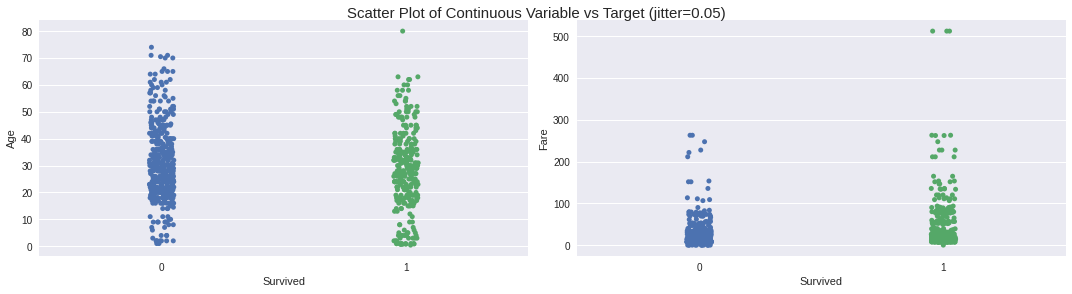

Total Number of Scatter Plots = 3


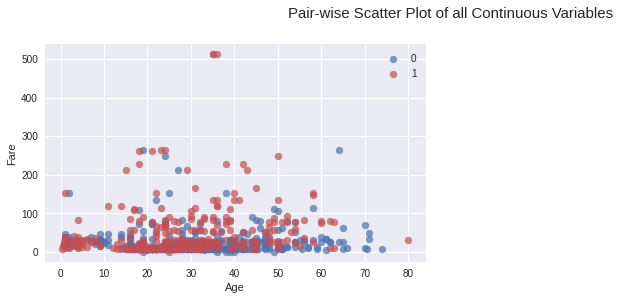

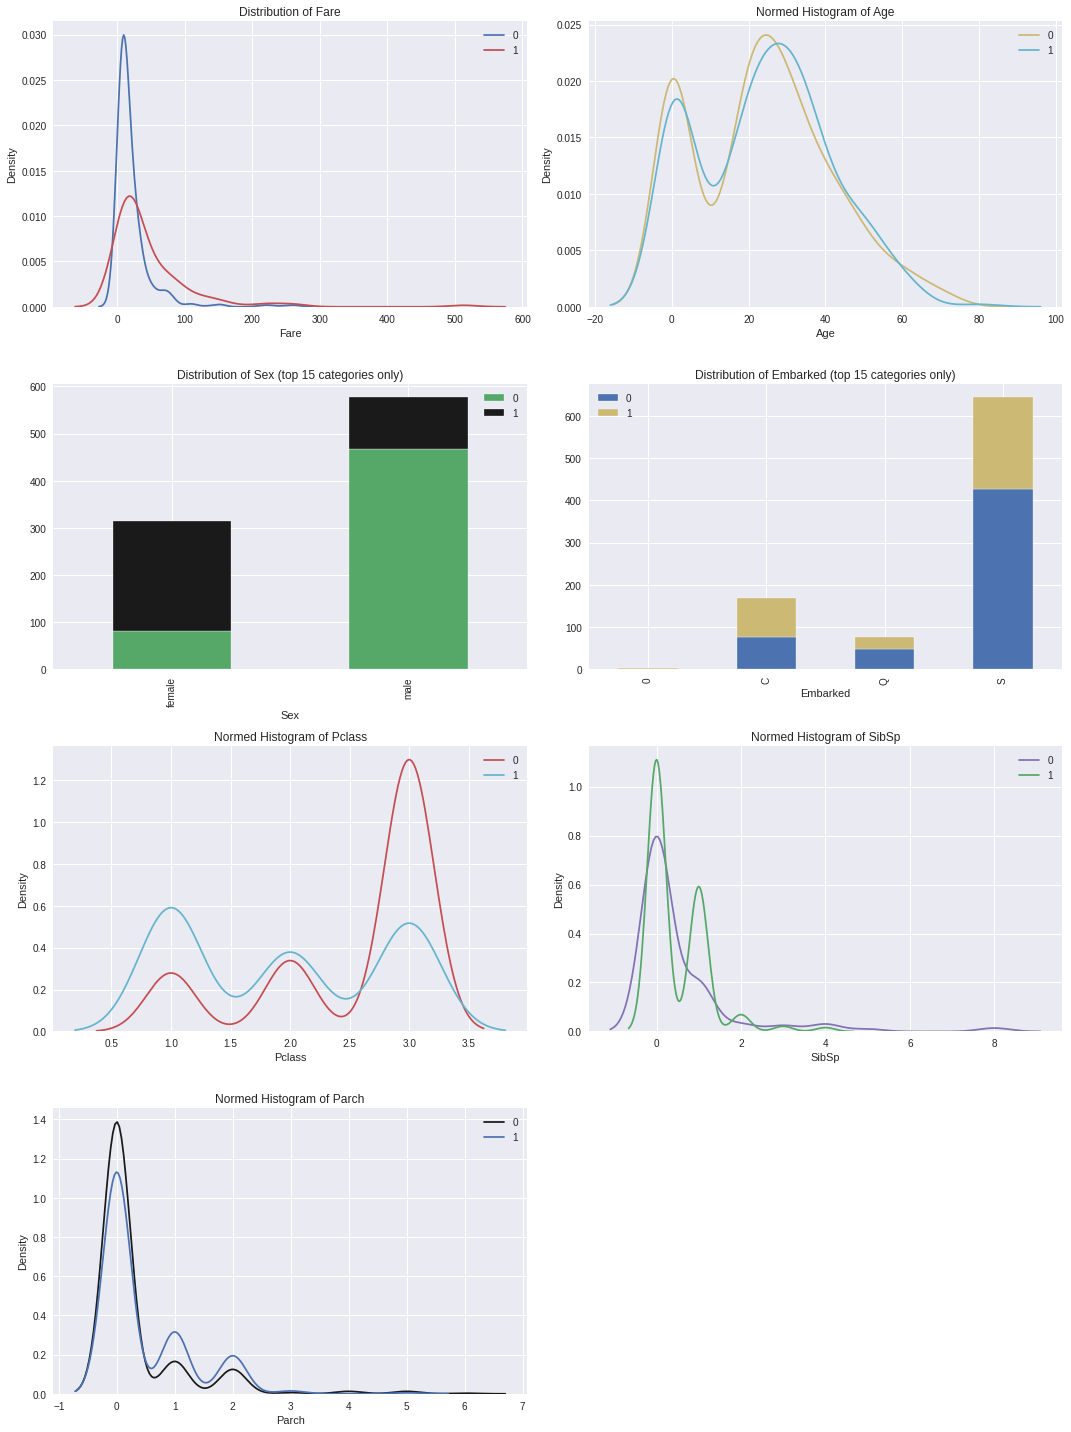

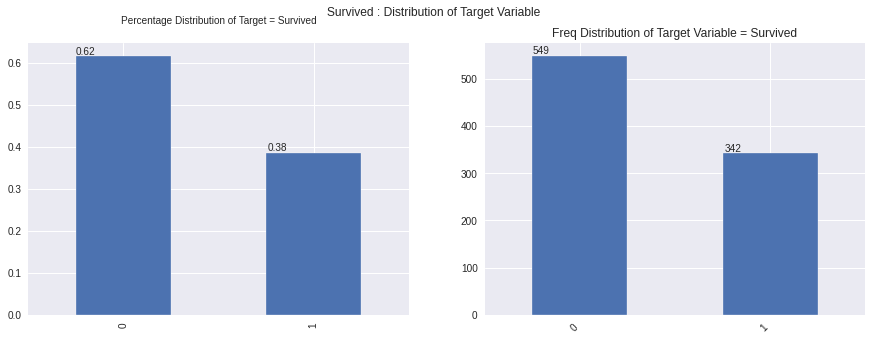

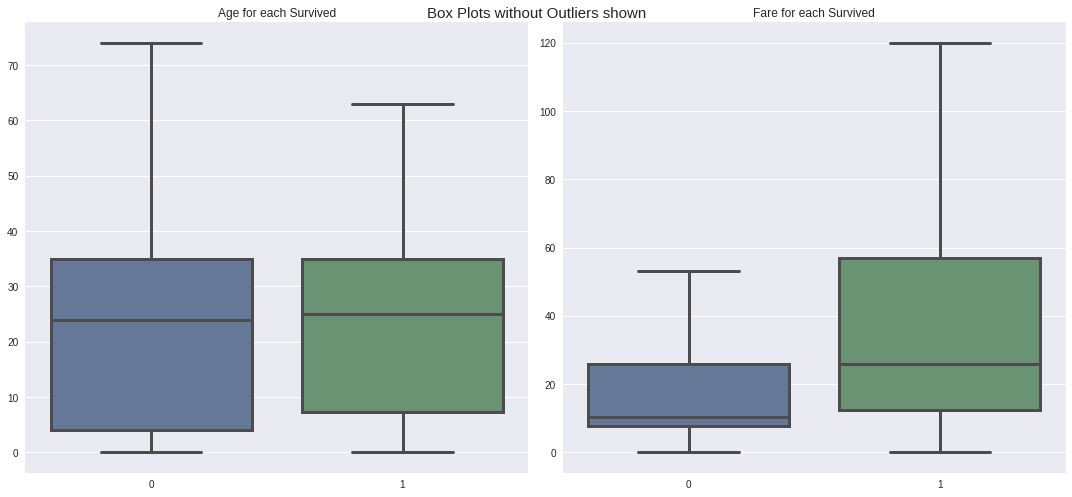

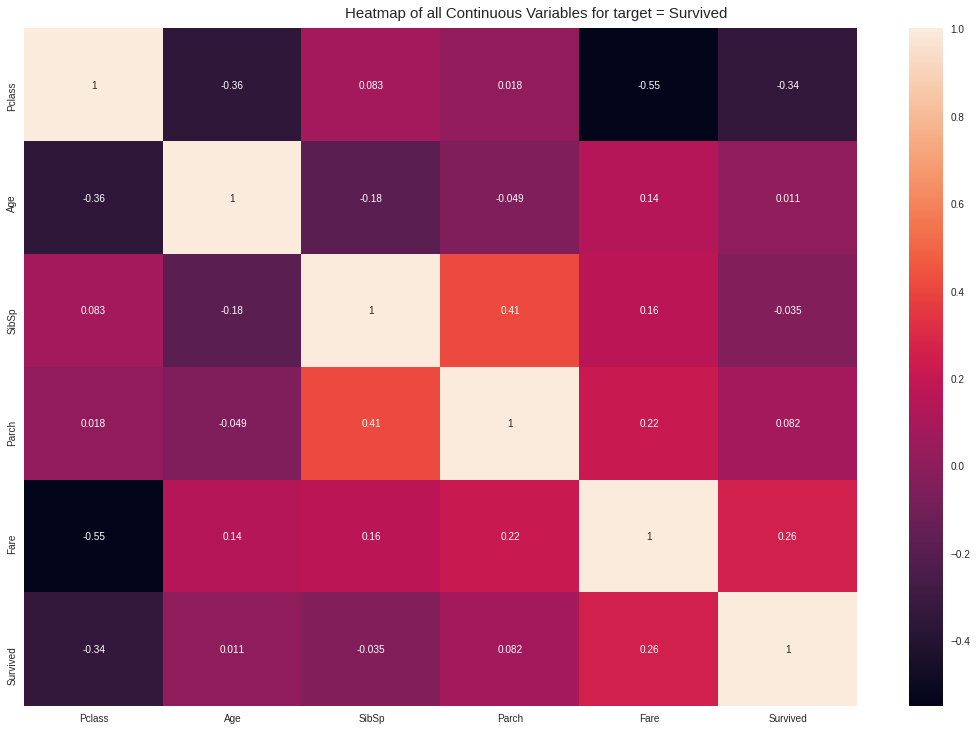

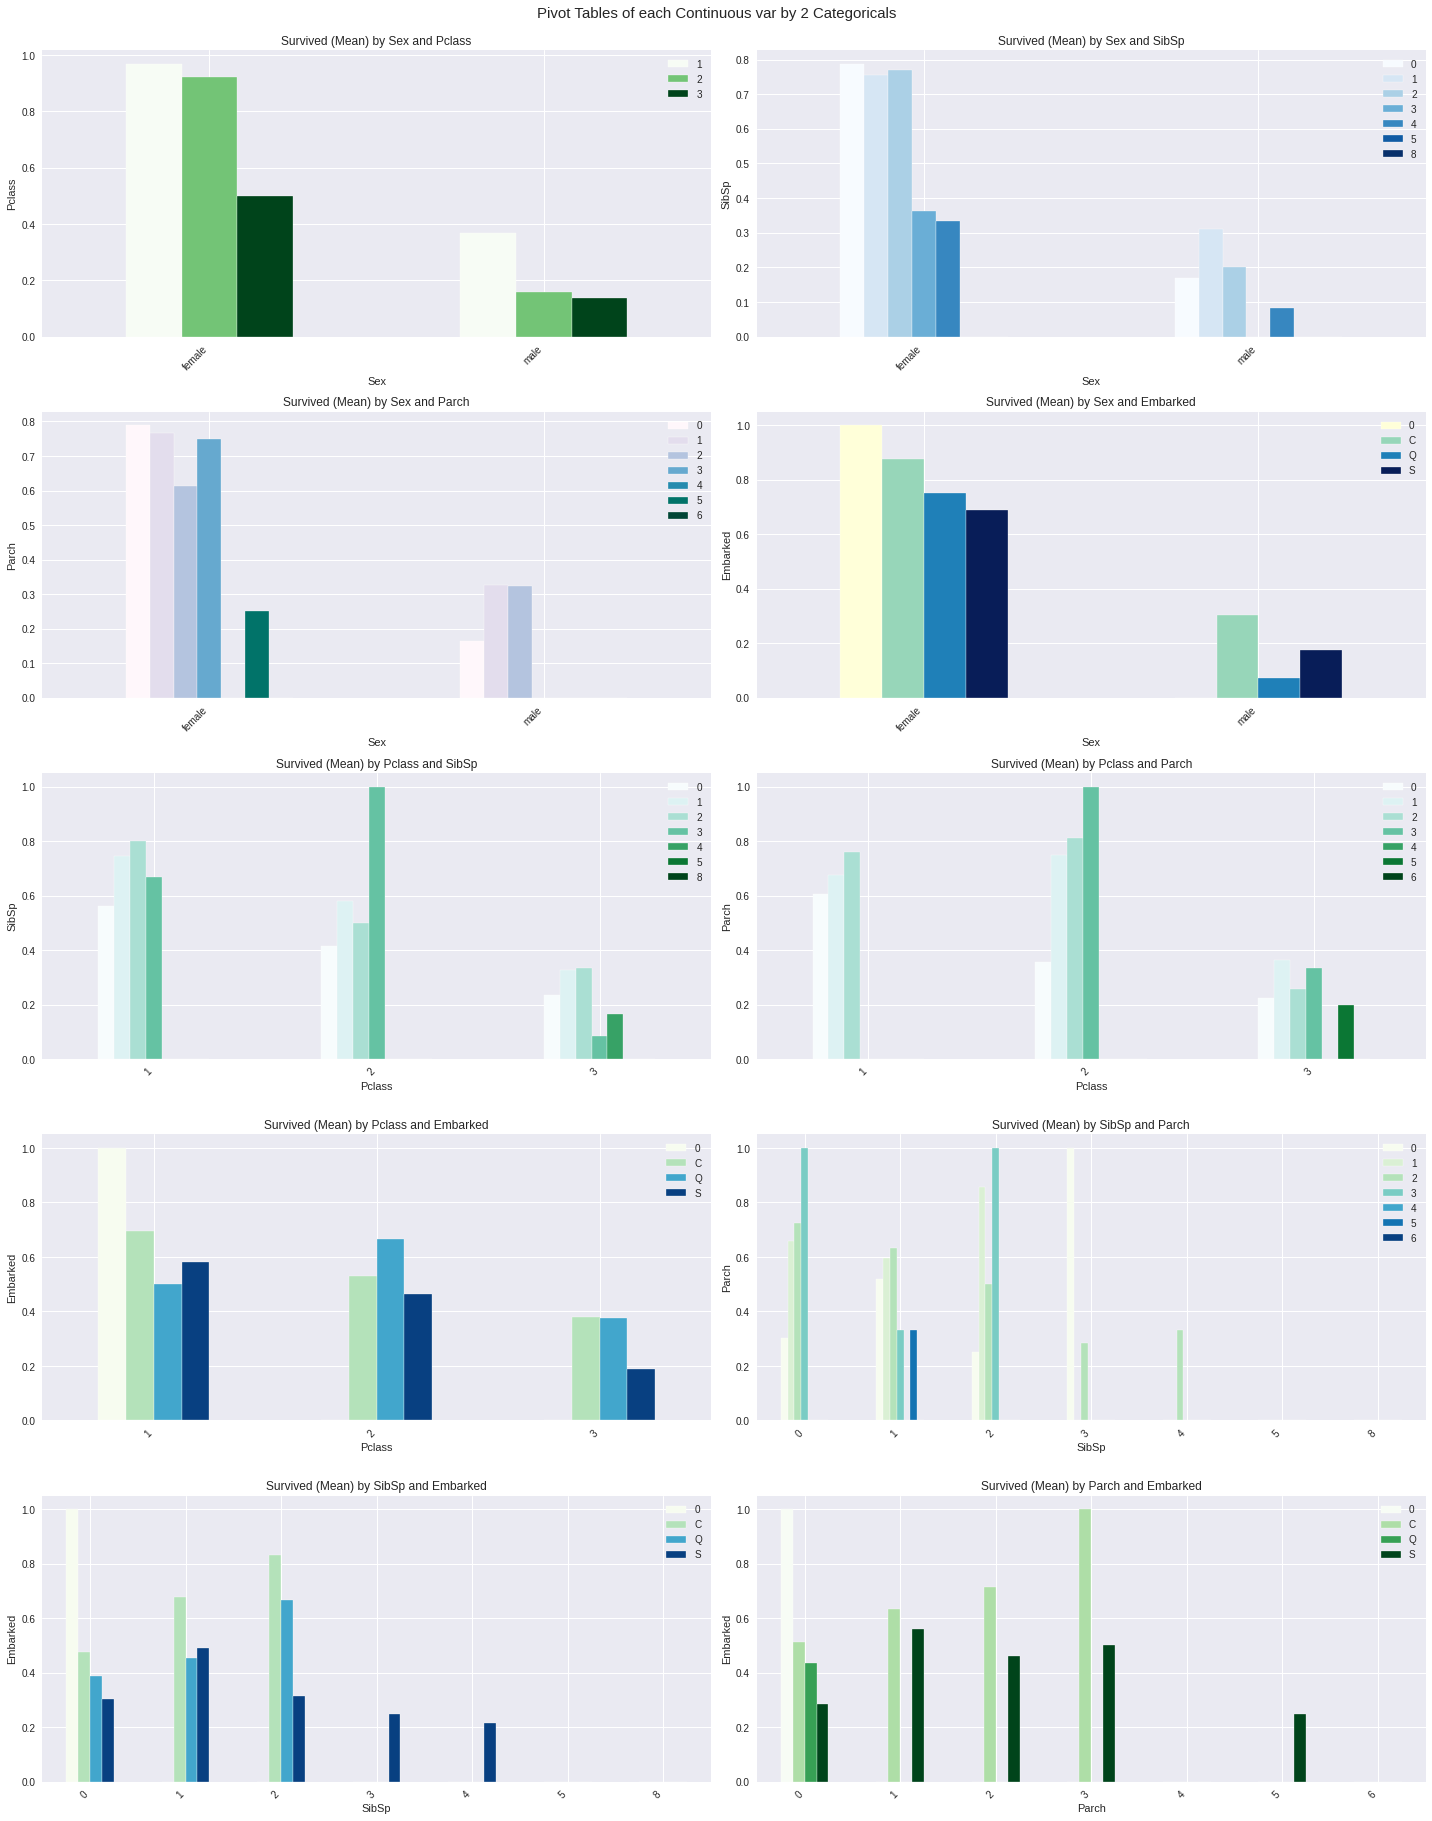

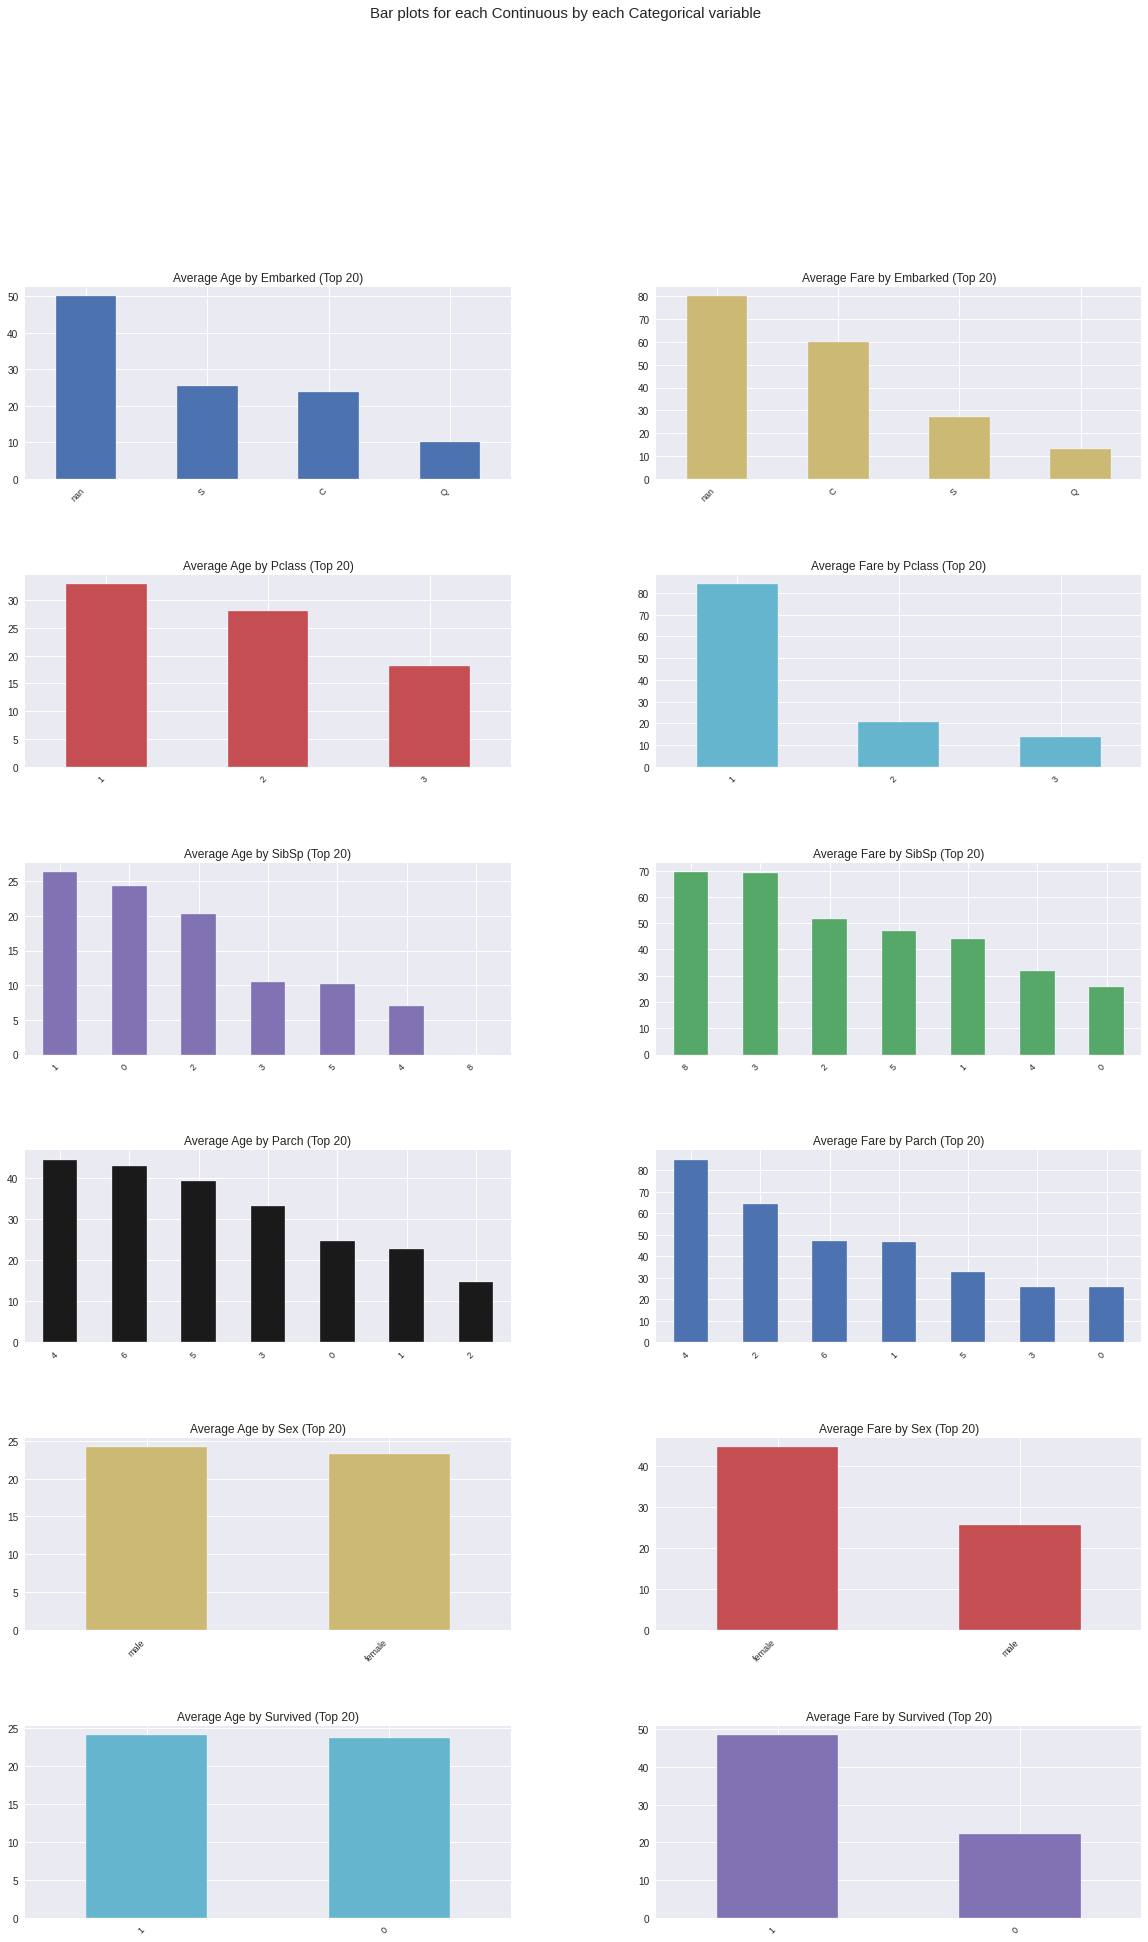

Time to run AutoViz (in seconds) = 8.848

 ###################### VISUALIZATION Completed ########################


In [10]:
ftc = AV.AutoViz(filename='', 
                  sep ='' , 
                  depVar ='Survived', 
                  dfte = dfe, 
                  header = 0, 
                  verbose = 0, 
                  lowess = False, 
                  chart_format ='png', 
                  max_rows_analyzed = 100000, 
                  max_cols_analyzed = 30
)

In [11]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.tabular.models.lr.lr_rapids_model import LinearRapidsModel
from autogluon.tabular.models.knn.knn_rapids_model import KNNRapidsModel

train_data = TabularDataset('/content/titanic_train.csv')
test_data = TabularDataset('/content/titanic_test.csv')

label = 'Survived'

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
#using integrated RAPIDS models along with some boosting models
predictor = TabularPredictor(
    label=label,
    eval_metric='accuracy',
    learner_kwargs={'ignored_columns': ['PassengerId']}
).fit(
    train_data,
    presets='best_quality',
    hyperparameters={'XGB': {'ag_args_fit': {'num_gpus': 1}},
        'GBM': [{}, {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, 'GBMLarge'],
        'CAT': {'ag_args_fit': {'num_gpus': 1}},
        KNNRapidsModel: {},
        LinearRapidsModel: {},
       
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20210625_093308/"
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210625_093308/"
AutoGluon Version:  0.1.1b20210312
Train Data Rows:    891
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['PassengerId']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11597.93 MB
	Train Data (Original)  Memory Usage: 0.31 MB (0.0% of available memory)
	Inferring data type

In [15]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
import pandas as pd
submission = test_data[['PassengerId']]
test_pred_proba = predictor.predict(test_data)
test_pred_proba=pd.DataFrame(test_pred_proba,columns=['Survived'])
submission = pd.concat([submission, test_pred_proba], axis=1)
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.864198,5.460562,170.711484,0.001938,0.438466,3,True,16
1,CatBoost_BAG_L2,0.863075,5.364149,164.053103,0.087795,67.850719,2,True,11
2,XGBoost_BAG_L2,0.859708,5.337838,108.475280,0.061484,12.272895,2,True,12
3,LightGBM_BAG_L2,0.857464,5.368146,98.910553,0.091792,2.708168,2,True,9
4,LightGBMXT_BAG_L2,0.856341,5.367960,98.395602,0.091606,2.193217,2,True,10
5,LightGBMLarge_BAG_L2,0.850730,5.370828,102.422300,0.094474,6.219915,2,True,13
6,CatBoost_BAG_L1,0.848485,0.089332,62.416674,0.089332,62.416674,1,True,3
7,WeightedEnsemble_L2,0.848485,0.091317,62.844692,0.001985,0.428018,2,True,8
8,LightGBMLarge_BAG_L1,0.843996,0.093822,4.399513,0.093822,4.399513,1,True,5
9,LightGBM_BAG_L1,0.842873,0.090927,2.263838,0.090927,2.263838,1,True,1
